In [13]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings(action='ignore') 

iris = load_iris()
iris_data = iris.data

df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


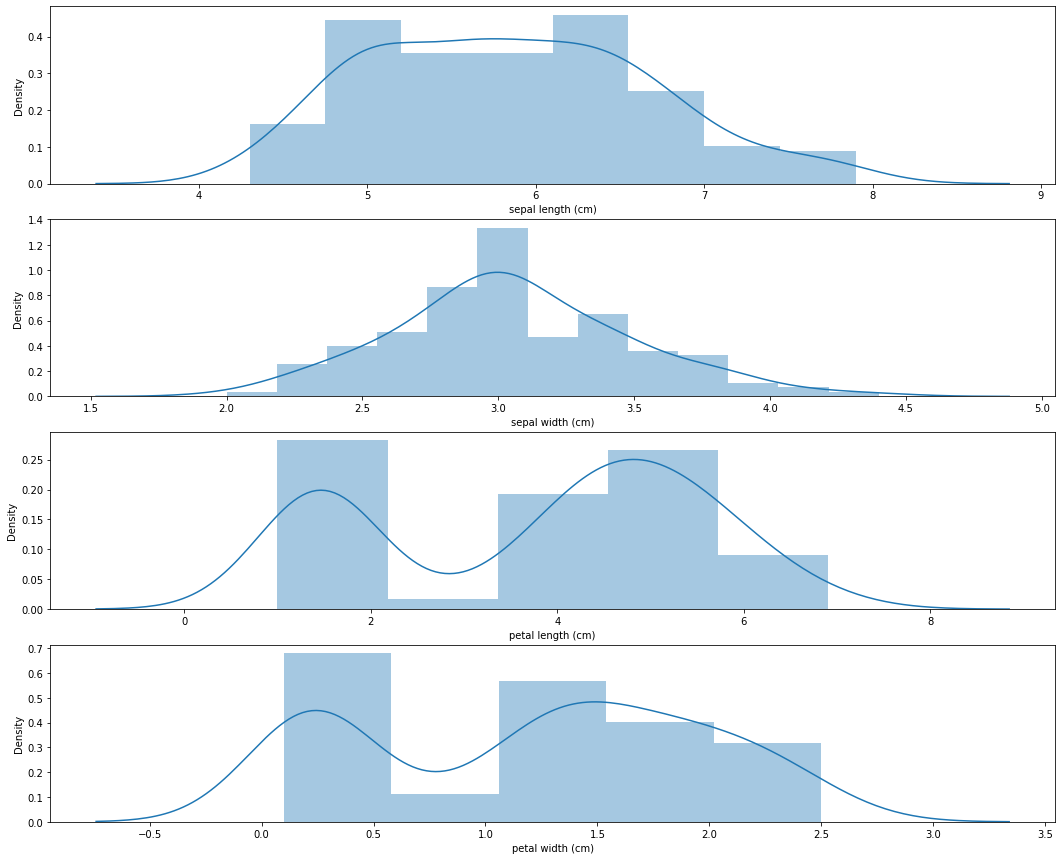

In [16]:
cols = df.columns
figure, ax = plt.subplots(nrows=len(cols), ncols=1)

figure.set_size_inches(18,15)
for idx, col in enumerate(cols):
  sns.distplot(df[col], ax= ax[idx])

##정규성 검정

Anderson-Darling test

In [17]:
from scipy import stats
col = 'sepal length (cm)'
stats.anderson(df[col], dist='norm') #dist .{‘norm’,’expon’,’logistic’,’gumbel’,’gumbel_l’, gumbel_r’,‘extreme1’}

AndersonResult(statistic=0.8891994860134105, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Shapiro-Wilk test for normality.

In [18]:
stats.shapiro(df[col])

(0.9760897755622864, 0.01017984002828598)

# 정규화 방식

## 표준화

(x - mean) / std 

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

standard_df = scaler.transform(df)

standard_df = pd.DataFrame(data = standard_df, columns = iris.feature_names)
standard_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [22]:
standard_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


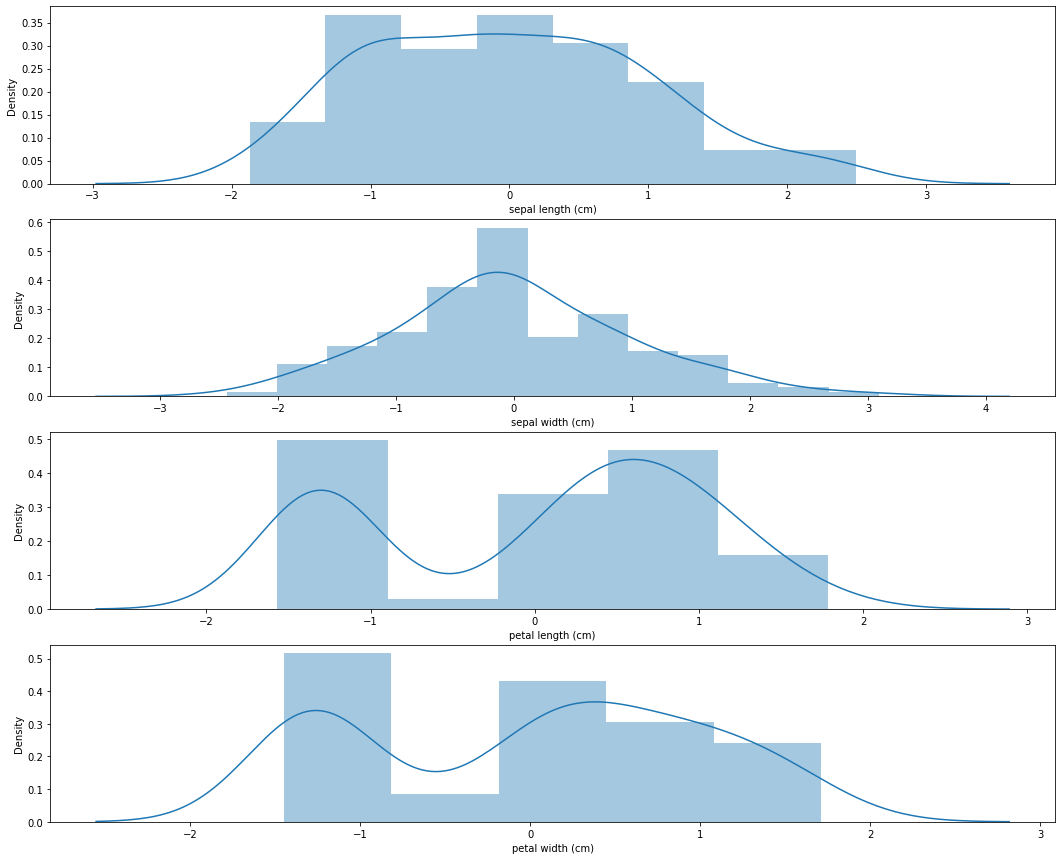

In [24]:
cols = standard_df.columns
figure, ax = plt.subplots(nrows=len(cols), ncols=1)

figure.set_size_inches(18,15)
for idx, col in enumerate(cols):
  sns.distplot(standard_df[col], ax= ax[idx])

## 정규화

(x - min) / max - min 

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df)
minmax_df = scaler.transform(df)

minmax_df = pd.DataFrame(data = minmax_df, columns = iris.feature_names)
minmax_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [31]:
minmax_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


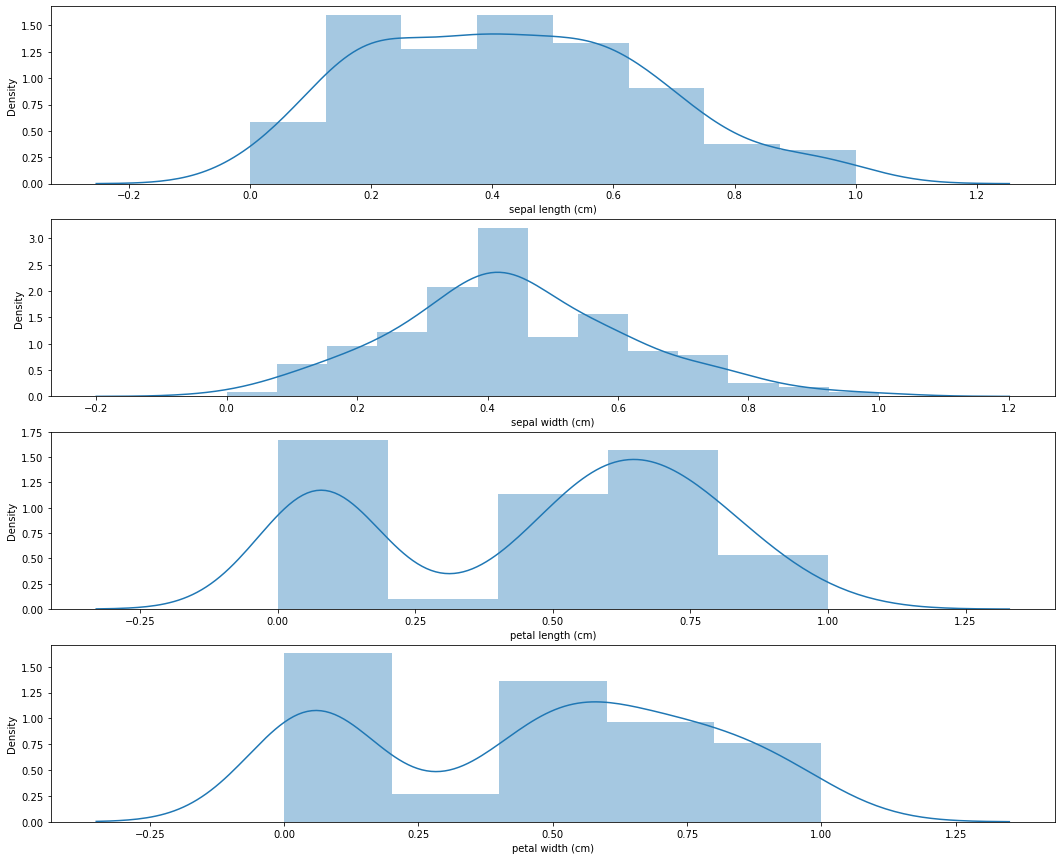

In [32]:
cols = minmax_df.columns
figure, ax = plt.subplots(nrows=len(cols), ncols=1)

figure.set_size_inches(18,15)
for idx, col in enumerate(cols):
  sns.distplot(minmax_df[col], ax= ax[idx])

## Log 변환

log(x)

In [34]:
log_df = np.log(df)
log_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.629241,1.252763,0.336472,-1.609438
1,1.589235,1.098612,0.336472,-1.609438
2,1.547563,1.163151,0.262364,-1.609438
3,1.526056,1.131402,0.405465,-1.609438
4,1.609438,1.280934,0.336472,-1.609438
...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909
146,1.840550,0.916291,1.609438,0.641854
147,1.871802,1.098612,1.648659,0.693147
148,1.824549,1.223775,1.686399,0.832909


In [35]:
log_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,1.755393,1.107439,1.175038,-0.172323
std,0.141189,0.143039,0.590125,0.983000
min,1.458615,0.693147,0.000000,-2.302585
25%,1.629241,1.029619,0.470004,-1.203973
50%,1.757858,1.098612,1.470110,0.262364
75%,1.856298,1.193922,1.629241,0.587787
max,2.066863,1.481605,1.931521,0.916291


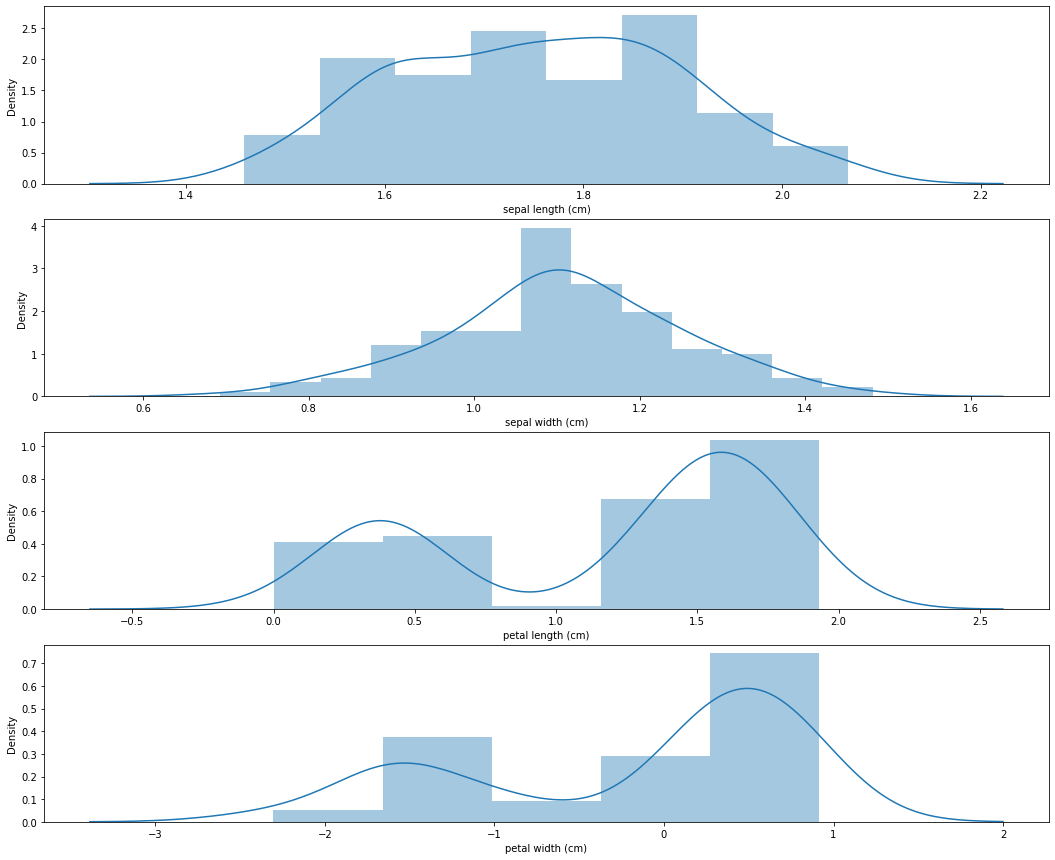

In [36]:
cols = log_df.columns
figure, ax = plt.subplots(nrows=len(cols), ncols=1)

figure.set_size_inches(18,15)
for idx, col in enumerate(cols):
  sns.distplot(log_df[col], ax= ax[idx])

## Centering 평균=0

x - mean

평균을 0으로 만들어줌

In [41]:
cols = standard_df.columns
cenrering_df = pd.DataFrame()
for col in cols:
  cenrering_df[col] = df[col] - df[col].mean()
cenrering_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [42]:
cenrering_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.125026e-15,-7.608728e-16,-2.552033e-15,-4.485301e-16
std,8.280661e-01,4.358663e-01,1.765298e+00,7.622377e-01
min,-1.543333e+00,-1.057333e+00,-2.758000e+00,-1.099333e+00
25%,-7.433333e-01,-2.573333e-01,-2.158000e+00,-8.993333e-01
50%,-4.333333e-02,-5.733333e-02,5.920000e-01,1.006667e-01
75%,5.566667e-01,2.426667e-01,1.342000e+00,6.006667e-01
max,2.056667e+00,1.342667e+00,3.142000e+00,1.300667e+00


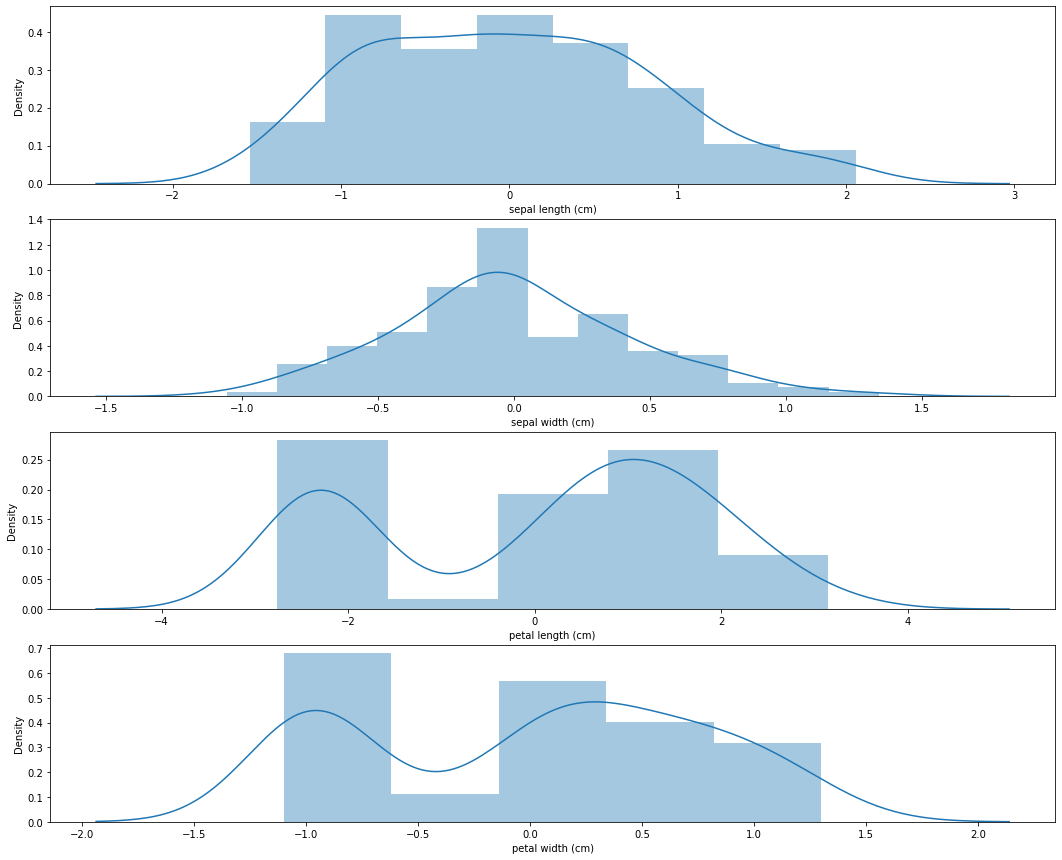

In [43]:
cols = cenrering_df.columns
figure, ax = plt.subplots(nrows=len(cols), ncols=1)

figure.set_size_inches(18,15)
for idx, col in enumerate(cols):
  sns.distplot(cenrering_df[col], ax= ax[idx])

## Box-Cox Power Transformation

In [38]:
import scipy.stats as stat
stat.boxcox(df['sepal length (cm)'])

(array([1.45137788, 1.41968552, 1.38647653, 1.3692597 , 1.43571311,
        1.49634173, 1.3692597 , 1.43571311, 1.33350342, 1.41968552,
        1.49634173, 1.40327904, 1.40327904, 1.31492057, 1.55203439,
        1.53853285, 1.49634173, 1.45137788, 1.53853285, 1.45137788,
        1.49634173, 1.45137788, 1.3692597 , 1.45137788, 1.40327904,
        1.43571311, 1.43571311, 1.46669492, 1.46669492, 1.38647653,
        1.40327904, 1.49634173, 1.46669492, 1.51069743, 1.41968552,
        1.43571311, 1.51069743, 1.41968552, 1.33350342, 1.45137788,
        1.43571311, 1.35160898, 1.33350342, 1.43571311, 1.45137788,
        1.40327904, 1.45137788, 1.3692597 , 1.48167842, 1.43571311,
        1.69587257, 1.62781788, 1.68500465, 1.51069743, 1.63965555,
        1.53853285, 1.61576654, 1.41968552, 1.65128656, 1.46669492,
        1.43571311, 1.56527203, 1.57825529, 1.59099316, 1.5247574 ,
        1.66271757, 1.5247574 , 1.55203439, 1.60349421, 1.5247574 ,
        1.56527203, 1.59099316, 1.61576654, 1.59

In [46]:
import scipy.stats as stat
cols = df.columns
boxcox_df = pd.DataFrame()
for col in cols:
  boxcox_df[col] = stat.boxcox(df[col])[0]
boxcox_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.451378,1.501599,0.395155,-1.002438
1,1.419686,1.287081,0.395155,-1.002438
2,1.386477,1.375764,0.297195,-1.002438
3,1.369260,1.331937,0.492636,-1.002438
4,1.435713,1.541816,0.395155,-1.002438
...,...,...,...,...
145,1.662718,1.287081,3.911846,1.101904
146,1.615767,1.045070,3.733028,0.794673
147,1.639656,1.287081,3.911846,0.873484
148,1.603494,1.460547,4.090191,1.101904


In [47]:
boxcox_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,1.549011,1.303009,2.581365,0.085869
std,0.109485,0.195017,1.627665,0.785739
min,1.314921,0.765259,0.000000,-1.200996
25%,1.451378,1.194040,0.589670,-0.837950
50%,1.552034,1.287081,3.148336,0.285808
75%,1.627818,1.418617,3.822497,0.714367
max,1.786340,1.837695,5.414418,1.248289


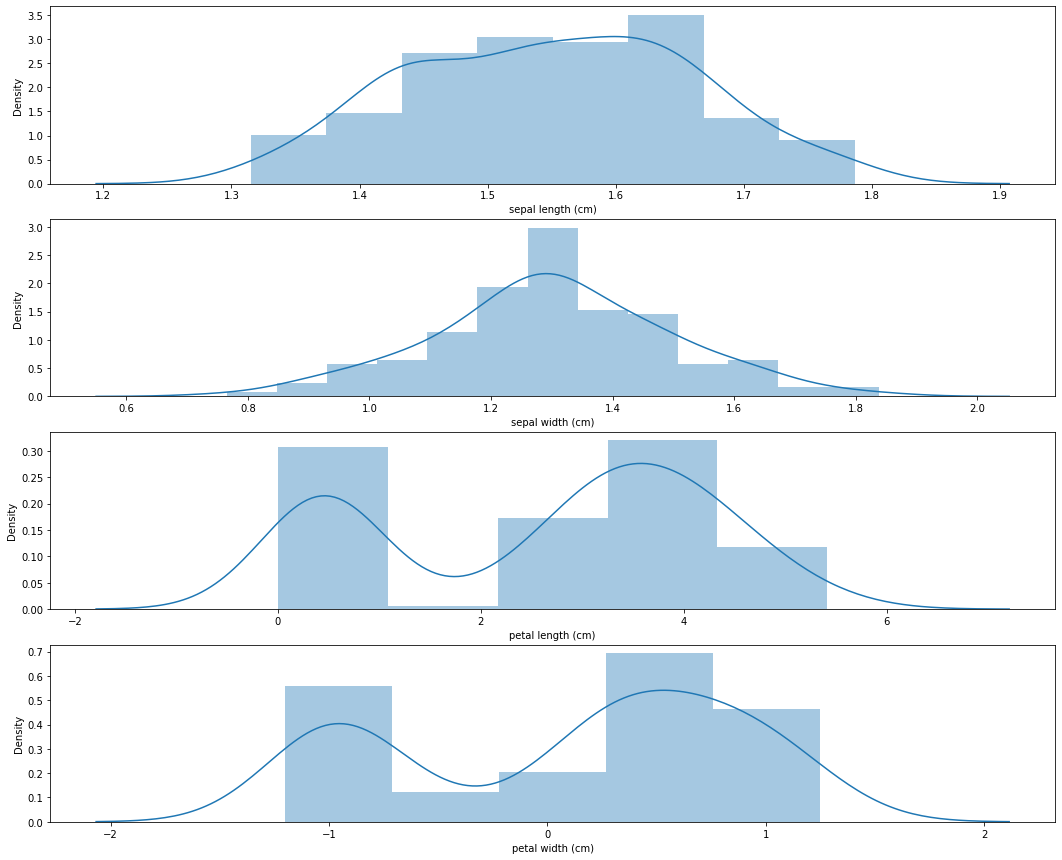

In [48]:
cols = boxcox_df.columns
figure, ax = plt.subplots(nrows=len(cols), ncols=1)

figure.set_size_inches(18,15)
for idx, col in enumerate(cols):
  sns.distplot(boxcox_df[col], ax= ax[idx])

# 스케일링시 주의할 점

학습 데이터를 스케일링 했다면 학습 데이터에 스케일링 한 값을 테스트 데이터에도 동일하게 적용해야 함

In [49]:
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

## train 데이터

In [52]:
scaler = MinMaxScaler()

scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터    :', train_array.reshape(-1))
print('Scale된 train_array 데이터 :', train_scaled.reshape(-1))

원본 train_array 데이터    : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


## test 데이터

In [53]:
scaler = MinMaxScaler()

scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('원본 train_array 데이터    :', test_array.reshape(-1))
print('Scale된 train_array 데이터 :', test_scaled.reshape(-1))

원본 train_array 데이터    : [0 1 2 3 4 5]
Scale된 train_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


## train 데이터로 스케일 후 테스트 데이터 변환

In [54]:
scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)
test_scaled = scaler.transform(test_array)

print('원본 train_array 데이터    :', train_array.reshape(-1))
print('Scale된 train_array 데이터 :', train_scaled.reshape(-1))

print('원본 test_array 데이터    :', test_array.reshape(-1))
print('Scale된 test_array 데이터 :', test_scaled.reshape(-1))

원본 train_array 데이터    : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터    : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]
